## Ejercicio. Del archivo fve32.mat
- Muestra el heatmap de la matriz de activación
- Utilizando los nombres del archivo .mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)
- Determina el nodo con mayores conexiones
- Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior1-. Muestra el heatmap de la matriz de activación


1-. Muestra el heatmap de la matriz de activación


In [7]:
# Ruta al archivo .mat
#fv3 = '/Users/ZvalEnes/Desktop/Neurociencias-2025-1/BCT/BCT/2019_03_03_BCT/data_and_demos/fve32.mat'
#mat2_data = scipy.io.loadmat(file_path)
import scipy.io

# Cargar el archivo .mat para inspeccionar su contenido
file_path = '/Users/ZvalEnes/Desktop/Neurociencias-2025-1/BCT/BCT/2019_03_03_BCT/data_and_demos/fve32.mat'
mat_data = scipy.io.loadmat(file_path)

# Revisar las claves y estructuras de datos en el archivo
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Names', 'CIJ'])

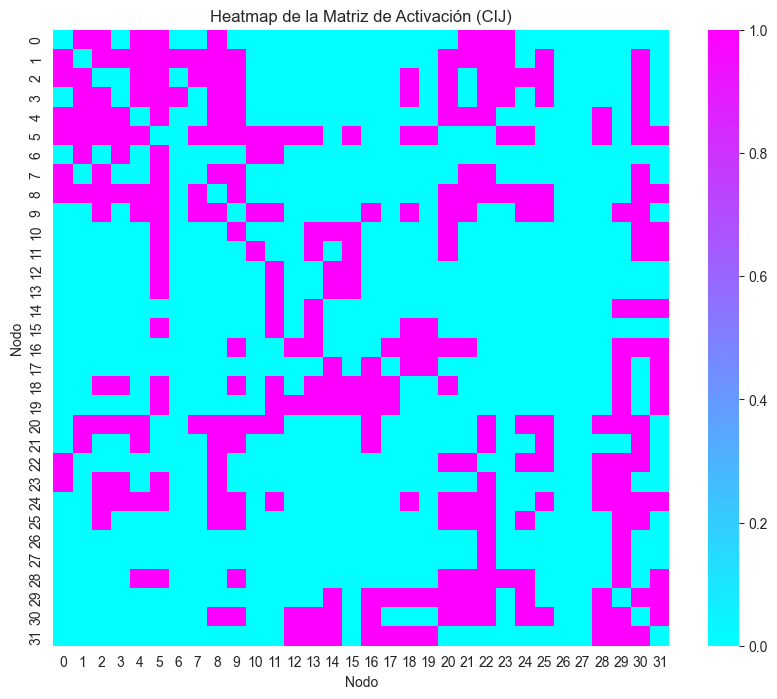

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer la matriz de activación
CIJ = mat_data['CIJ']

# Graficar el heatmap de la matriz de activación
plt.figure(figsize=(10, 8))
sns.heatmap(CIJ, cmap="cool", square=True)
plt.title("Heatmap de la Matriz de Activación (CIJ)")
plt.xlabel("Nodo")
plt.ylabel("Nodo")
plt.show()

2-. Utilizando los nombres del archivo .mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)


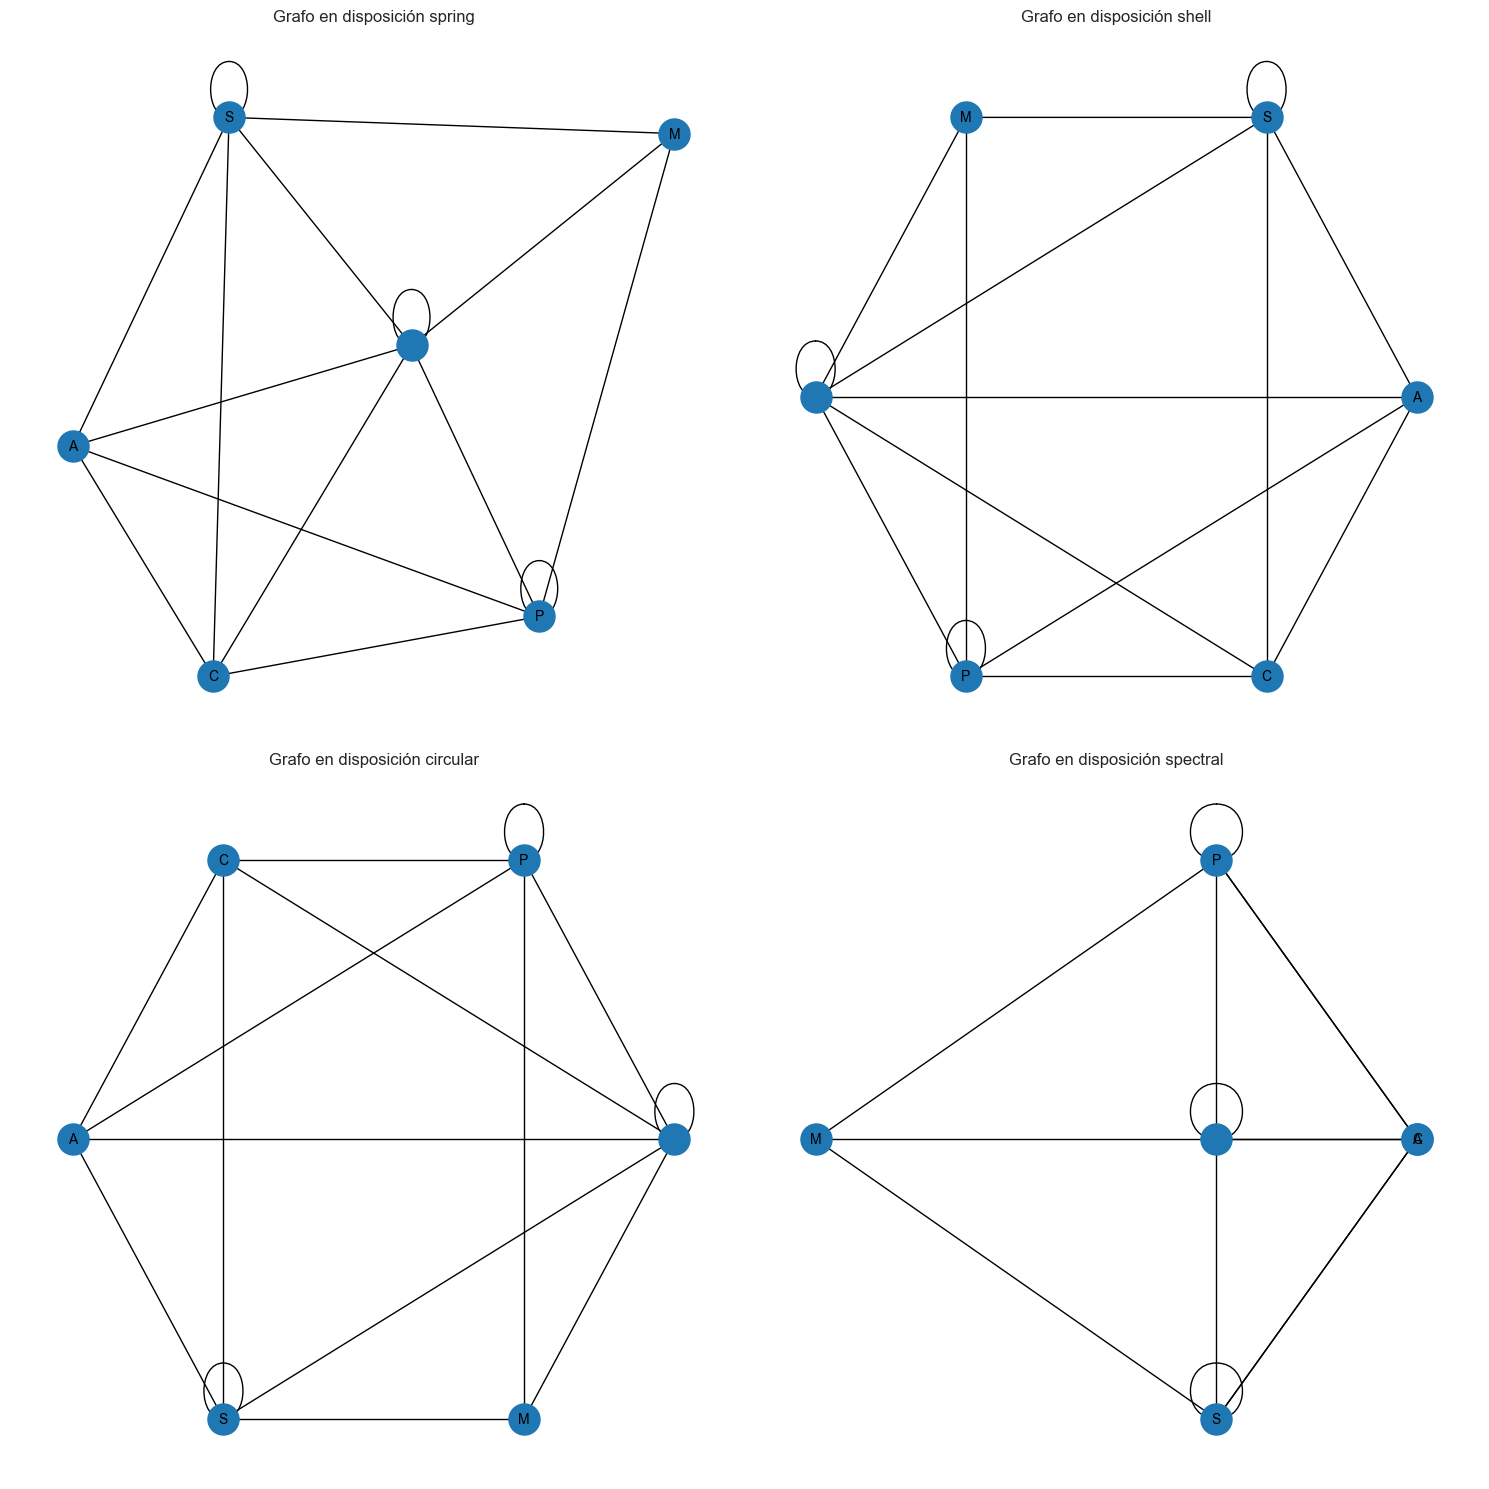

In [9]:
import networkx as nx

# Crear el grafo a partir de la matriz de adyacencia y los nombres de los nodos
G = nx.from_numpy_array(CIJ)
node_labels = {i: name[0] for i, name in enumerate(mat_data['Names'].flatten())}
G = nx.relabel_nodes(G, node_labels)


# Configuración del gráfico
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Disposiciones distintas para visualizar el grafo
layouts = [
    ('spring', nx.spring_layout(G)),
    ('shell', nx.shell_layout(G)),
    ('circular', nx.circular_layout(G)),
    ('spectral', nx.spectral_layout(G))
]

# Graficar el grafo en distintas disposiciones
for ax, (layout_name, layout) in zip(axs.flatten(), layouts):
    nx.draw(G, pos=layout, with_labels=True, node_size=500, font_size=10, ax=ax)
    ax.set_title(f"Grafo en disposición {layout_name}")

plt.tight_layout()
plt.show()

3-. Determina el nodo con mayores conexiones


In [10]:
# Obtener el grado de cada nodo
node_degrees = dict(G.degree())

# Encontrar el nodo con el mayor número de conexiones
max_degree_node = max(node_degrees, key=node_degrees.get)
max_degree = node_degrees[max_degree_node]

print(f"El nodo con mayores conexiones es '{max_degree_node}' con un grado de {max_degree}.")

El nodo con mayores conexiones es ' ' con un grado de 7.


4-. Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior


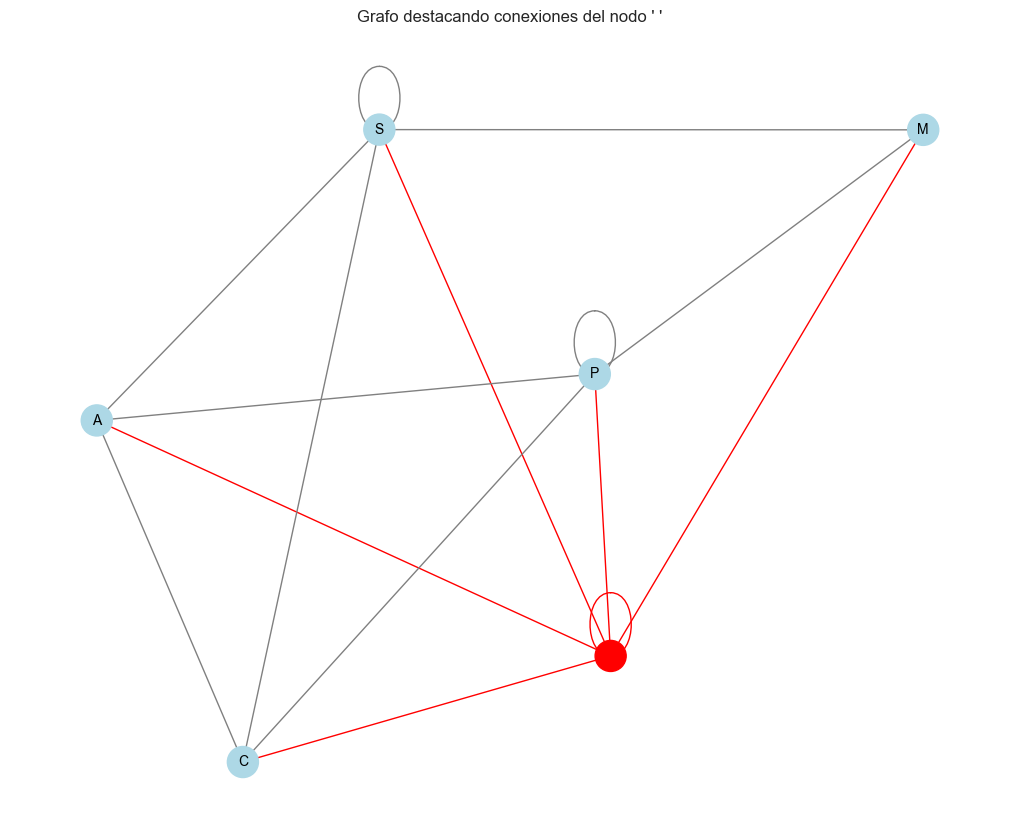

In [11]:
# Crear un color diferente para las conexiones del nodo con mayor grado
node_colors = ['red' if node == max_degree_node else 'lightblue' for node in G.nodes()]
edge_colors = ['red' if max_degree_node in edge else 'gray' for edge in G.edges()]
 
# Dibujar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, edge_color=edge_colors, font_size=10)
plt.title(f"Grafo destacando conexiones del nodo '{max_degree_node}'")
plt.show()